In [1]:
import numpy as np
import pandas as pd
import joblib

model = joblib.load('../model/dtc-model.joblib')
vectorizer = joblib.load('../model/vectorizer_model_judul.joblib')

In [2]:
df = pd.read_csv('../../../cleaned-data-kbk.csv', index_col=0)

In [3]:
from sklearn.model_selection import train_test_split

X = df['judul_tokens']
y = df['kbk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(884, 2337)

In [5]:
predictions = model.predict(X_test_tfidf)

# Grafik Perbandingan

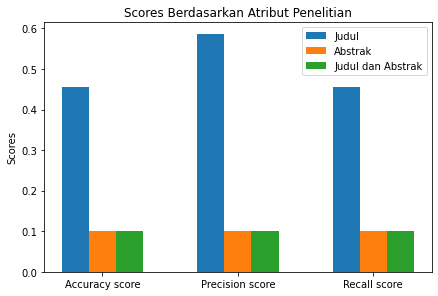

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

w=0.2
x = ["Accuracy score", "Precision score","Recall score"]
judul = [accuracy_score(y_test, predictions), precision_score(y_test, predictions, average='weighted'), recall_score(y_test, predictions, average='weighted')]
abstrak = [0.1, 0.1, 0.1]
judul_abstrak = [0.1, 0.1, 0.1]

fig, ax = plt.subplots()
bar1 = np.arange(len(x)) 
bar2 = [i+w for i in bar1] 
bar3 = [i+w for i in bar2]

plt.bar(bar1, judul,w,label="Judul") 
plt.bar(bar2, abstrak,w,label="Abstrak") 
plt.bar(bar3, judul_abstrak, w, label="Judul dan Abstrak")

fig.tight_layout()

ax.set_ylabel('Scores')
ax.set_title('Scores Berdasarkan Atribut Penelitian')
ax.set_xticks(bar1+w, x)
ax.legend()
plt.show()

# Demo

In [7]:
title_input = input("Masukkan judul Skripsi:\n")

hasil = model.predict_proba(vectorizer.transform([title_input]))

print(f"Judul Skripsi: {title_input}")

list1 = hasil.tolist()
cls = model.classes_
list2 = cls.tolist()

d = {"Kelompok Bidang Keahlian":list2,"Probability":list1[0]}
df_proba = pd.DataFrame(d)

print(df_proba.sort_values("Probability", ascending=False))

# klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree

Masukkan judul Skripsi:
klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree
Judul Skripsi: klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree
                             Kelompok Bidang Keahlian  Probability
8   Rekayasa pengetahuan dan ilmu data (Knowledge ...     0.871429
2   Game Technology and Machine Learning Applications     0.128571
0   Biomedic and Intelligent Assistive Technology ...     0.000000
1        Evaluasi dan Pengelolaan Pendidikan Kejuruan     0.000000
3   Intelligent Power Electronics and Smart Grid (...     0.000000
4   Intelligent Power and Advanced energy System (...     0.000000
5              Ketenegakerjaan Teknologi dan Kejuruan     0.000000
6         Kurikulum Pendidikan Teknologi dan Kejuruan     0.000000
7   Pengembangan Aplikasi dan Media Pembelajaran T...     0.000000
9   Sistem Dinamis, Kendali, dan Robotika (Dynamic...     0.000000
10       Strategi Pembelajaran Teknologi dan Kejuruan     0.000000
11  Teknologi Dig